In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [1]:
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.0.0
altair                       5.2.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.2
bleach                       6.1.0
blinker                      1.7.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
subm_df = pd.read_csv("sample_submission.csv")


train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [3]:
train_df.shape

(165034, 14)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train_df["Exited"].value_counts(1)

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


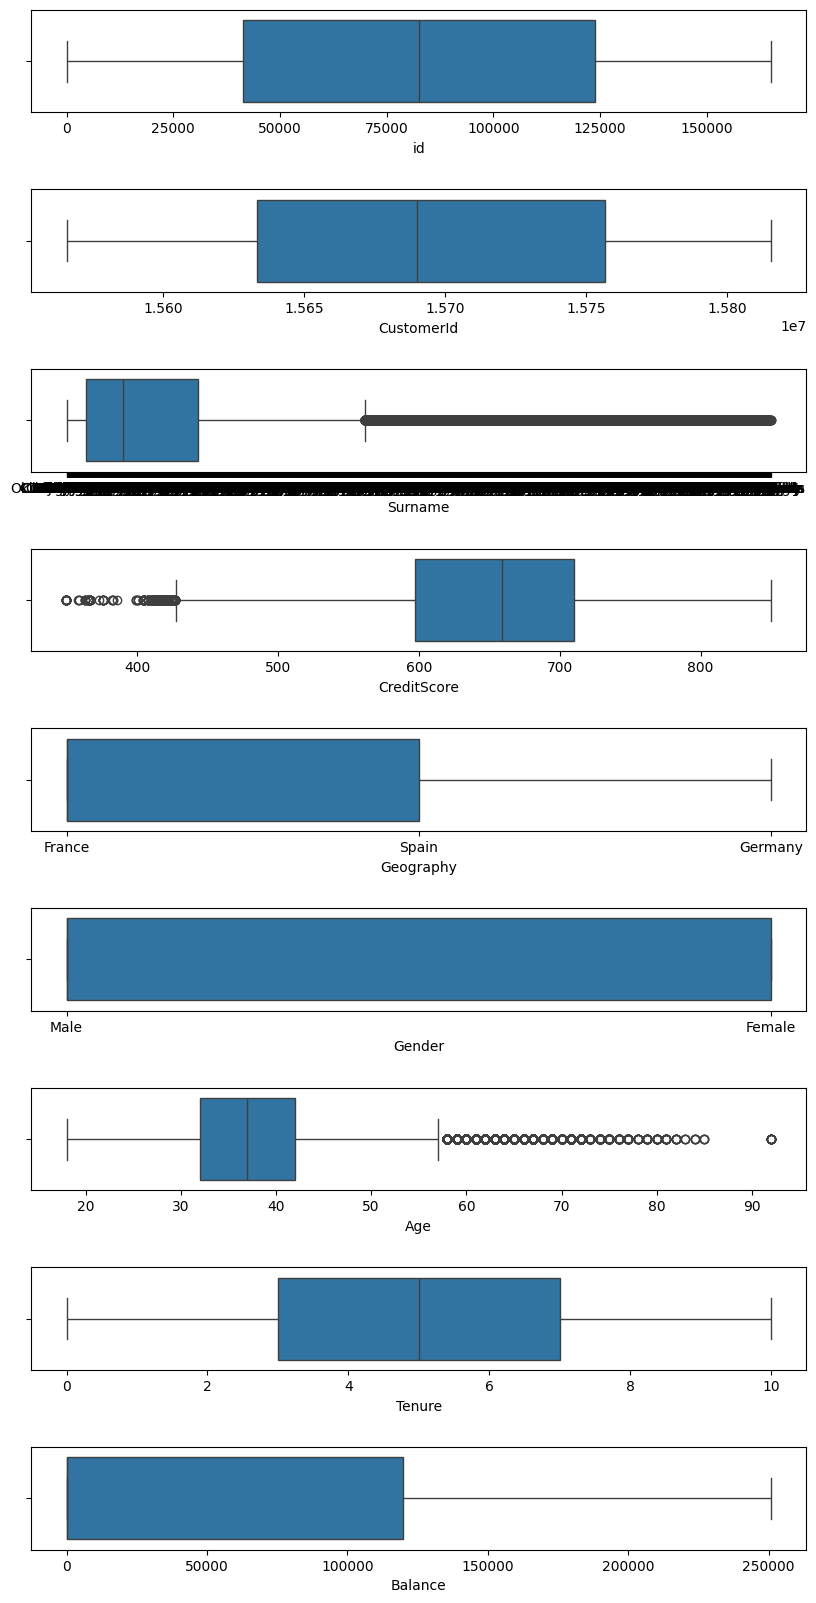

In [7]:
columns_name = train_df.columns
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    # Ax
    sns.boxplot(x=columns_name[i], data=train_df, ax=ax[i])

# EDA

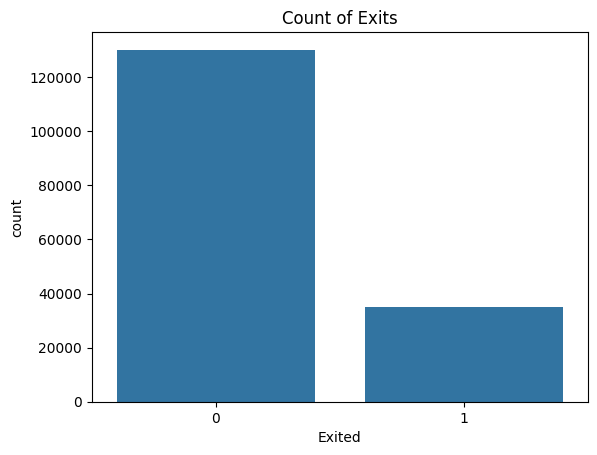

In [8]:
sns.countplot(x = train_df["Exited"] , data = train_df)
plt.title("Count of Exits");

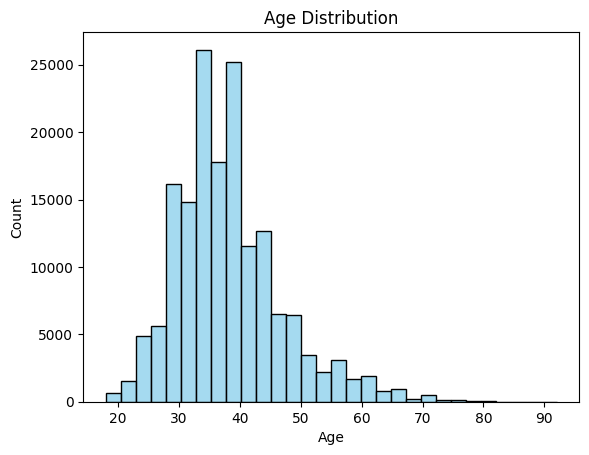

In [9]:
sns.histplot(train_df['Age'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Age Distribution');

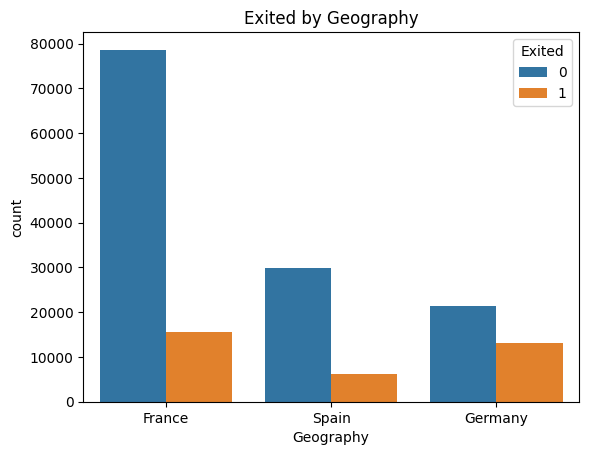

In [10]:
sns.countplot(x='Geography', hue='Exited', data=train_df)
plt.title('Exited by Geography');

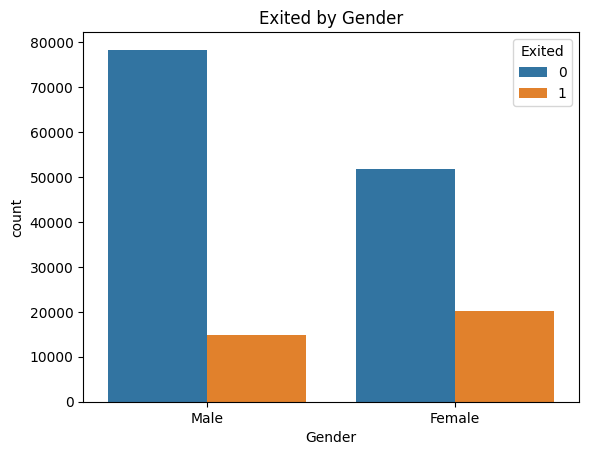

In [11]:
sns.countplot(x='Gender', hue='Exited', data=train_df)
plt.title('Exited by Gender');

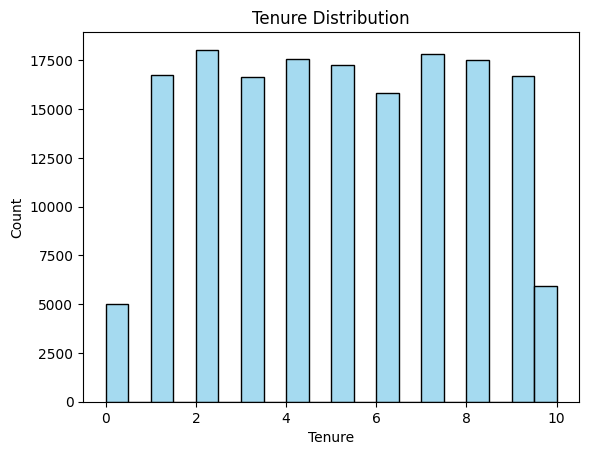

In [12]:
sns.histplot(train_df['Tenure'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Tenure Distribution');

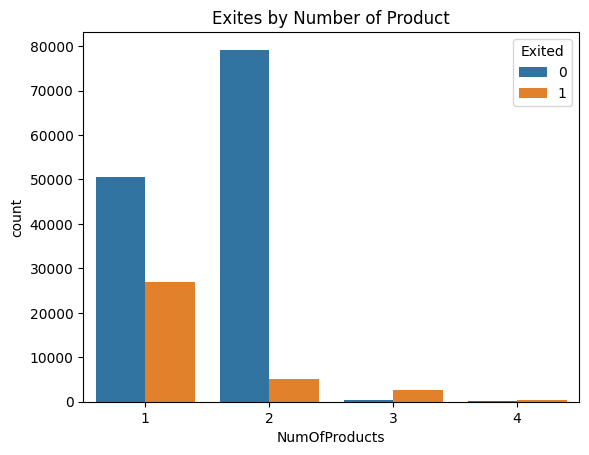

In [13]:
sns.countplot(x='NumOfProducts', hue='Exited', data=train_df)
plt.title("Exites by Number of Product");

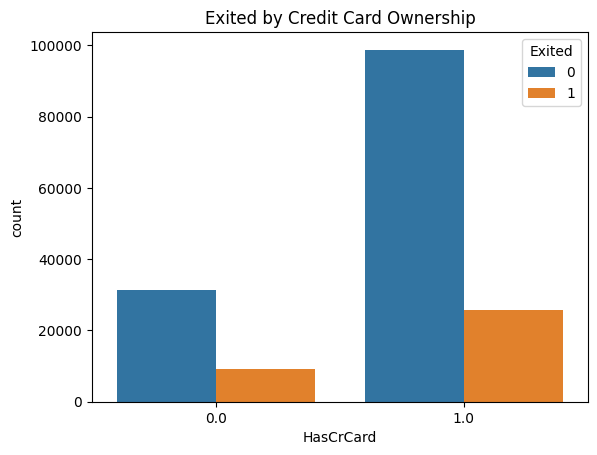

In [14]:
sns.countplot(x='HasCrCard', hue='Exited', data=train_df)
plt.title('Exited by Credit Card Ownership');

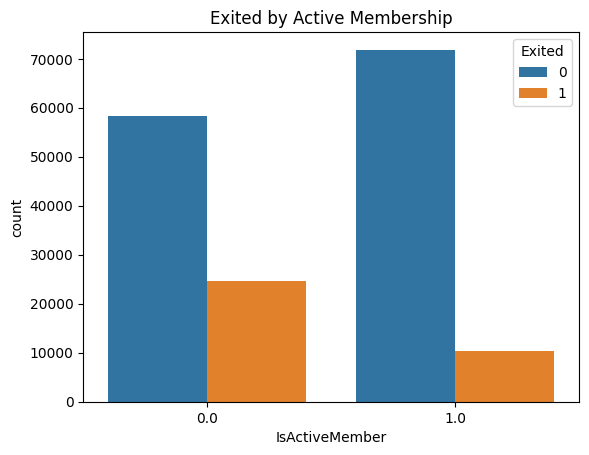

In [15]:
sns.countplot(x='IsActiveMember', hue='Exited', data=train_df)
plt.title('Exited by Active Membership');

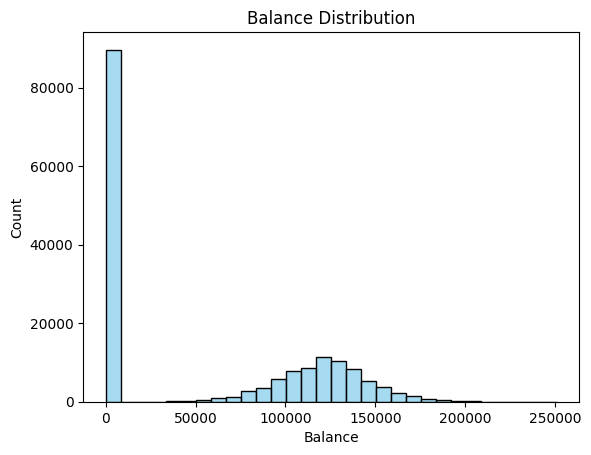

In [16]:
sns.histplot(train_df['Balance'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Balance Distribution');



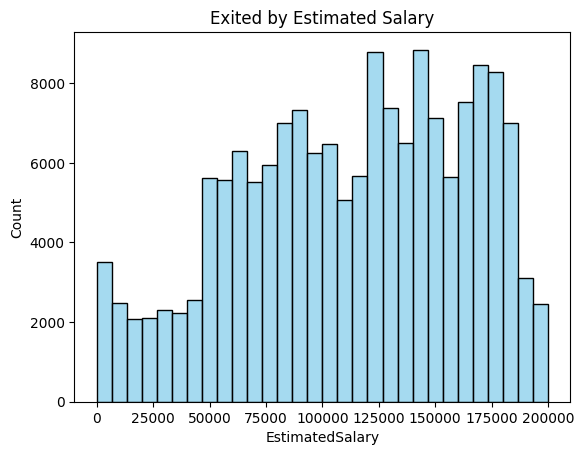

In [17]:
# Visualize exits based on estimated salary
sns.histplot(train_df['EstimatedSalary'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Exited by Estimated Salary');

In [18]:
id = test_df["id"]

In [19]:
train_df = train_df.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_df = test_df.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [20]:
cat_cols = train_df.select_dtypes(['object']).columns
num_cols = train_df.select_dtypes(['float64', 'int64']).columns

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_train_df = pd.DataFrame( ohe.fit_transform(train_df[cat_cols]), columns=ohe.get_feature_names_out(cat_cols) )
encoded_test_df = pd.DataFrame( ohe.transform(test_df[cat_cols]), columns=ohe.get_feature_names_out(cat_cols) )
encoded_train_df.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,1.0


In [22]:
train_df = pd.concat([encoded_train_df, train_df[num_cols]], axis=1)
test_df = pd.concat([encoded_test_df, test_df[num_cols.drop('Exited')]], axis=1)
train_df.head()


,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,0.0,1.0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,0.0,0.0,1.0,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,0.0,0.0,1.0,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,0.0,0.0,1.0,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,0.0,1.0,1.0,716,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Geography_Germany  165034 non-null  float64
 1   Geography_Spain    165034 non-null  float64
 2   Gender_Male        165034 non-null  float64
 3   CreditScore        165034 non-null  int64  
 4   Age                165034 non-null  float64
 5   Tenure             165034 non-null  int64  
 6   Balance            165034 non-null  float64
 7   NumOfProducts      165034 non-null  int64  
 8   HasCrCard          165034 non-null  float64
 9   IsActiveMember     165034 non-null  float64
 10  EstimatedSalary    165034 non-null  float64
 11  Exited             165034 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 15.1 MB


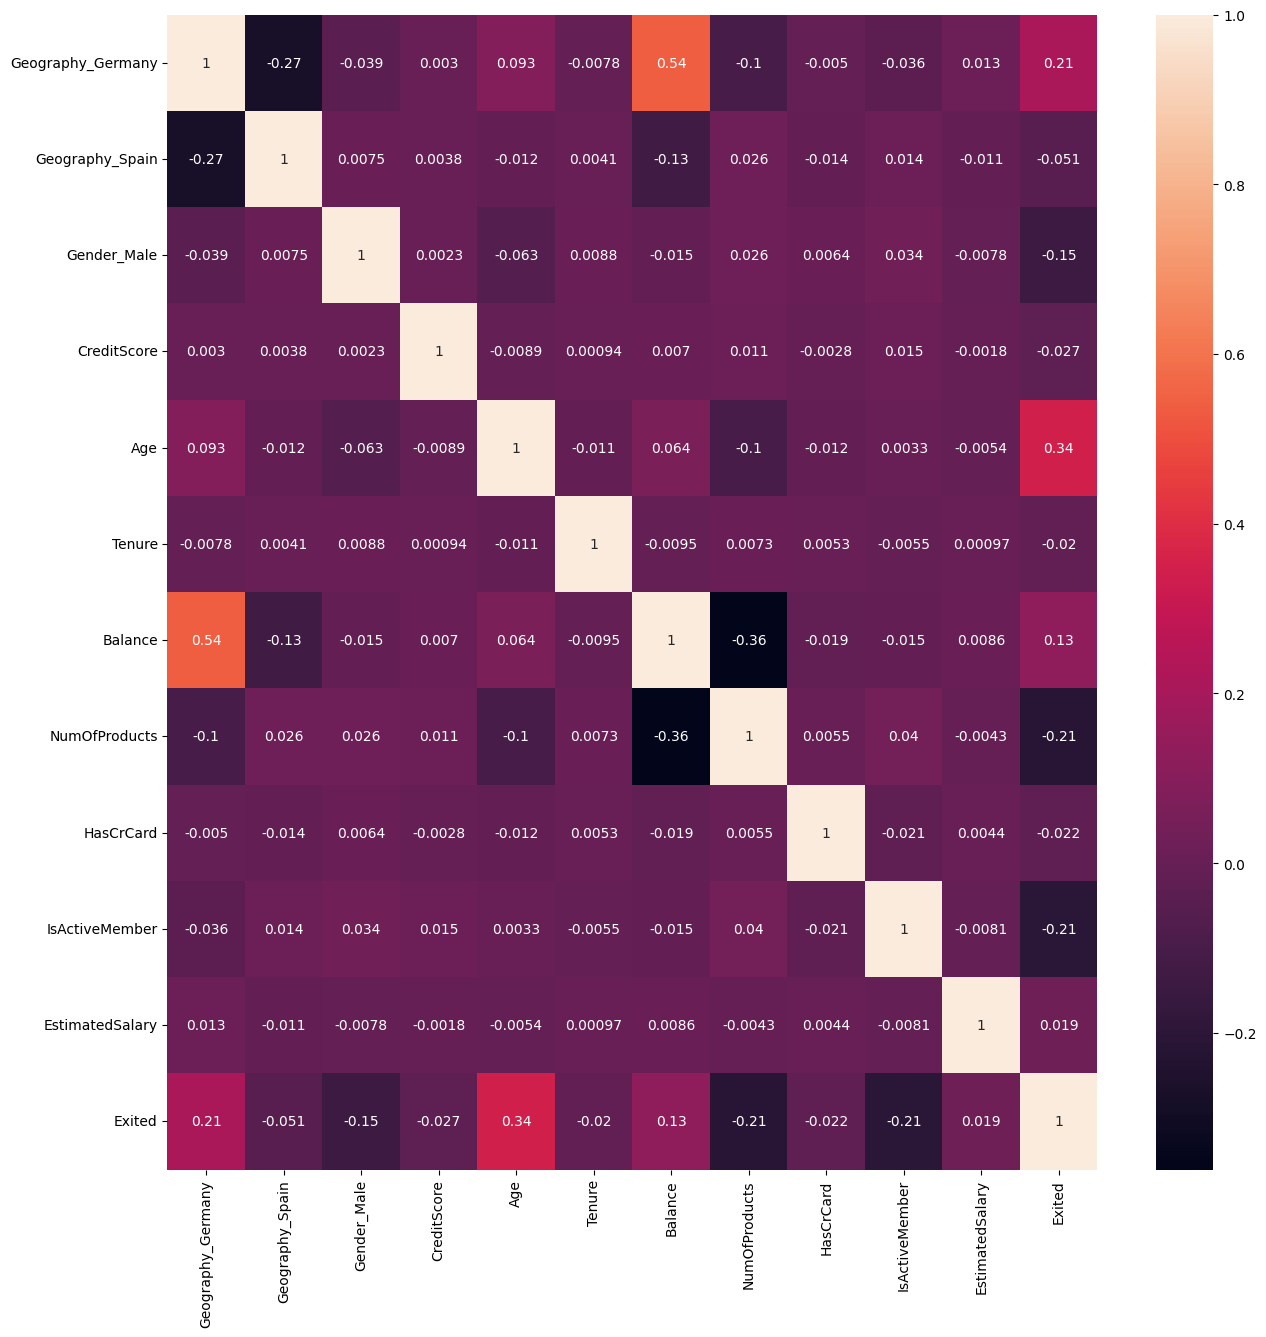

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train_df.corr(), annot=True)
plt.show()

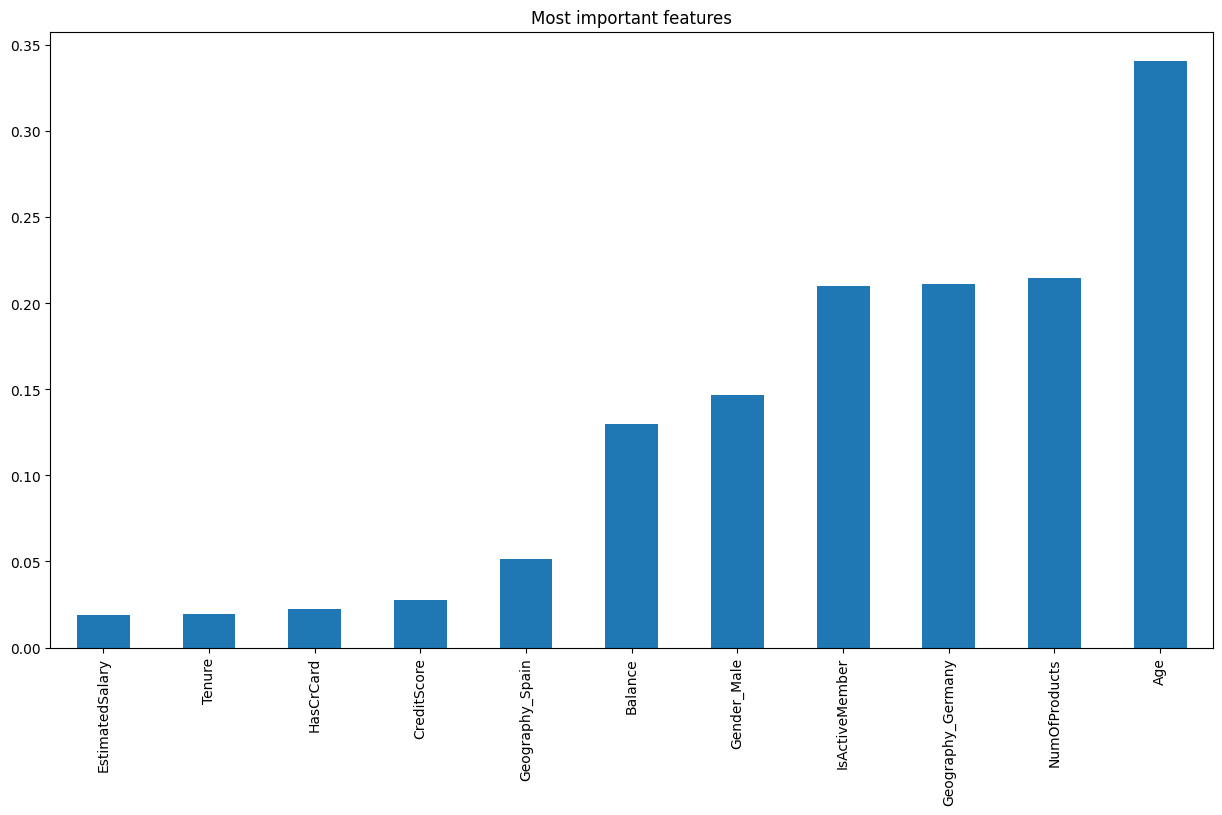

In [25]:
plt.figure(figsize=(15,8))
d = train_df.corr()['Exited'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = train_df.drop(columns = "Exited")
y = train_df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

# Oversample Training Set using SMOTE¶


In [27]:
# Apply SMOTE for oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

C:\Users\test\AppData\Local\Temp\ipykernel_25912\3074175551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=y_resampled, palette='viridis')
C:\Users\test\AppData\Local\Temp\ipykernel_25912\3074175551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=y_train, palette='viridis')


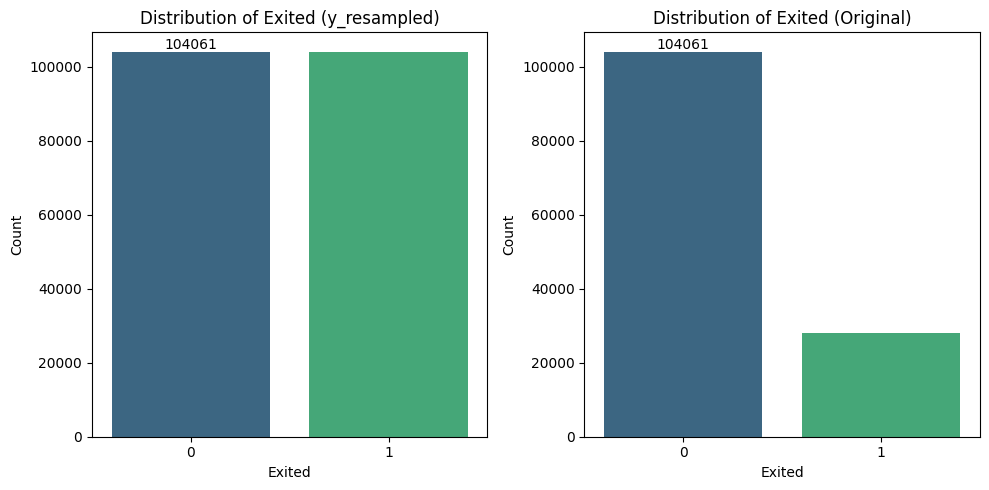

In [28]:
# Visualize the distribution of the 'Exited' variable after SMOTE Oversampling
plt.figure(figsize=(10, 5))
sns.set_palette('Set2')
# Count plot for y_resampled (target variable)
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=y_resampled, palette='viridis')
plt.title('Distribution of Exited (y_resampled)')
plt.xlabel('Exited')
plt.ylabel('Count')
ax1.bar_label(ax1.containers[0])

# Count plot for the original target variable (y_train)
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Exited (Original)')
plt.xlabel('Exited')
plt.ylabel('Count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show()

In [29]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# RandomForestClassifier

In [30]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score,classification_report


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score,classification_report


rfc = RandomForestClassifier(max_depth=10,random_state=42)
rfc.fit(X_resampled,y_resampled)


RandomForestClassifier(max_depth=10, random_state=42)

In [32]:
rfc_pred = rfc.predict_proba(X_test)[:,1]
rfc_pred_binary = rfc.predict(X_test)


In [33]:
# Evaluate the model using ROC-AUC score
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred)
rfc_roc_auc = roc_auc_score(y_test, rfc_pred)
print(f"Test ROC-AUC Score: {rfc_roc_auc:.4f}")

Test ROC-AUC Score: 0.8860


In [34]:
rfc_accuracy = accuracy_score(rfc_pred_binary, y_test)
rfc_f1 = f1_score(rfc_pred_binary, y_test)

print('Random Forest Model')
print(f'Accuracy: {rfc_accuracy}')
print(f'F1 Score: {rfc_f1}')

Random Forest Model
Accuracy: 0.8576665555791195
F1 Score: 0.6496644295302013


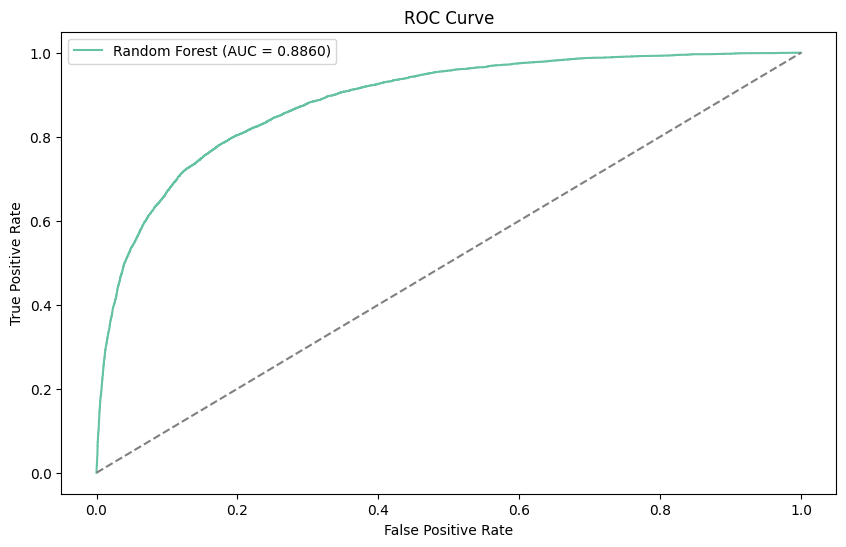

In [35]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest (AUC = {rfc_roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [36]:
confusion_matrix(y_test,rfc_pred_binary)

array([[23953,  2099],
       [ 2599,  4356]], dtype=int64)

In [37]:
print(classification_report(y_test,rfc_pred_binary))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     26052
           1       0.67      0.63      0.65      6955

    accuracy                           0.86     33007
   macro avg       0.79      0.77      0.78     33007
weighted avg       0.85      0.86      0.86     33007



# XGboost Classifier

In [38]:
pip install xgboost

In [39]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(n_estimators=100,random_state=42)
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
xgb_pred = xgb.predict_proba(X_test)[:,1]
xgb_pred_binary = xgb.predict(X_test)

In [41]:
# Evaluate the model using ROC-AUC score
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)
print(f"Test ROC-AUC Score: {xgb_roc_auc:.4f}")

Test ROC-AUC Score: 0.8875


In [42]:
xgb_accuracy = accuracy_score(xgb_pred_binary, y_test)
xgb_f1 = f1_score(xgb_pred_binary, y_test)

print('XGB Model')
print(f'Accuracy: {xgb_accuracy}')
print(f'F1 Score: {xgb_f1}')

XGB Model
Accuracy: 0.8643318084042779
F1 Score: 0.6494441834977297


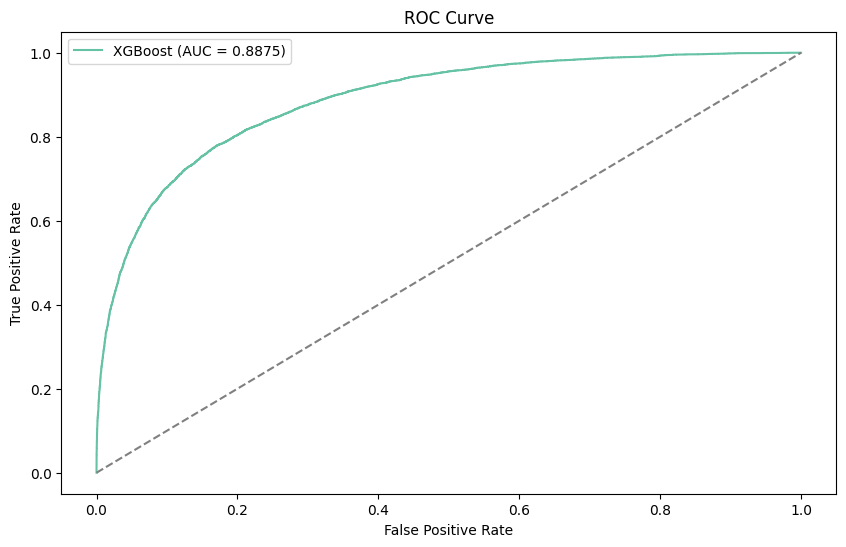

In [43]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [44]:
test_pred = np.round(xgb.predict_proba(test_df)[:,1], 2)

In [45]:
submission_df = pd.DataFrame({
    'Exited': test_pred
}, index=id)

In [46]:
submission_df.head()


,Exited
id,
165034,0.02
165035,0.87
165036,0.08
165037,0.23
165038,0.37


In [47]:
submission_df.to_csv('submission.csv')